#**KELOMPOK H**

1.   Aghna Syahputra Santoso (2206051481)
2.   Golda Aurelia Silalahi (2206826173)
3. Luthfi Athallah Herdita Wiryaman (2206826980)
4. Shinta Chandra (2206053940)
5. Yohanes Bryan Sagala (2006568696)



# **Pre-processing**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.stats as stats
from statsmodels.stats.diagnostic import het_white, het_breuschpagan
from sklearn.decomposition import PCA
from IPython.display import clear_output

from statsmodels.stats.outliers_influence import variance_inflation_factor

pd.set_option('display.max_columns', None)

In [ ]:
from google.colab import drive #Import data dari drive
drive.mount('/content/drive')
!pip install -q xlrd
import pandas as pd
cf = pd.read_excel('/content/drive/MyDrive/Data Kompstat/data_kesehatan-Mental-SRQ-2023--Filtered.xlsx')
cf

Mounted at /content/drive


,ID,WILAYAH,JENIS KELAMIN,USIA,LAMA BERDINAS,PENDIDIKAN TERAKHIR,TINGGI BADAN,BERAT BADAN,LINGKAR PINGGANG,Status Perkawinan,PENGELUARAN/BULAN,Apakah saudara pernah di diagnosa atau menderita penyakit Jantung ?,Apakah saudara pernah di diagnosa atau menderita penyakit Stroke ?,Apakah saudara pernah di diagnosa atau menderita penyakit Diabetes Melitus ?,Apakah saudara pernah di diagnosa atau menderita penyakit Hipertensi ?,Apakah saudara pernah di diagnosa atau menderita penyakit Kanker ?,Apakah saudara pernah di diagnosa atau menderita penyakit Ginjal ?,Apakah saudara pernah di diagnosa atau menderita penyakit Tumor ?,Apakah saudara pernah di diagnosa atau menderita penyakit Osteoartritis ?,Apakah saudara pernah di diagnosa atau menderita penyakit Lambung ?,Apakah saudara pernah di diagnosa atau menderita penyakit Liver ?,Apakah saudara pernah di diagnosa atau menderita penyakit Tuberculosis (TBC) ?,Apakah saudara pernah di diagnosa atau menderita penyakit Demam Berdarah Dengue (DBD) ?,Apakah saudara pernah di diagnosa atau menderita penyakit COVID-19 ?,Apakah saudara pernah di diagnosa atau menderita penyakit HIV/AIDS ?,Apakah saudara pernah di diagnosa atau menderita penyakit Diare ?,Apakah saudara pernah di diagnosa atau menderita penyakit Malaria ?,Apakah saudara pernah di diagnosa atau menderita penyakit Gonore atau Sipilis ?,Apakah saudara pernah di diagnosa atau menderita penyakit Thypus ?,Apakah saudara pernah di diagnosa atau menderita penyakit Dermatitis (Skabies)/ peradangan atau iritasi kulit ?,Apakah saudara pernah di diagnosa atau menderita penyakit Mikosis (infeksi jamur) ?,Sering menderita sakit kepala ?,Tidak nafsu makan ?,Sulit tidur ?,Mudah takut ?,"Merasa tegang, cemas atau kuatir ?",Tangan anda gemetar ?,Pencernaan anda terganggu / buruk ?,Sulit untuk berpikir jernih ?,Merasa tidak bahagia ?,Menangis lebih sering ?,Merasa sulit untuk menikmati kegiatan sehari – hari?,Sulit untuk mengambil keputusan ?,Pekerjaan anda sehari – hari terganggu ?,Tidak mampu melakukan hal – hal yang bermanfaat dalam hidup?,Kehilangan minat pada berbagai hal ?,Tidak merasa berharga?,Mempunyai pikiran untuk mengakhiri hidup?,Merasa lelah sepanjang waktu?,Mengalami rasa tidak enak di perut?,Mudah lelah ?,Apakah saudara menderita penyakit gigi dan mulut (karies/gigi berlubang),Jika Ya berapa jumlah gigi saudara yang Karies,Berapa kali saudara olahraga/aktifitas fisik selama seminggu ?,Seberapa banyak Saudara mengkonsumsi air mineral dalam satu hari?,Seberapa sering Saudara mengkonsumsi buah dan sayur dalam sehari?,Dalam 1 hari berapa kali Saudara mandi/ mencuci badan?,Berapa lama saudara mandi ?,Apakah saudara merokok ?,"Jika Ya, Berapa Batang Saudara merokok dalam sehari?",Seberapa banyak saudara mengkonsumsi gula/pemanis setiap harinya ?,Seberapa banyak Saudara mengkonsumsi Alkohol setiap hari ?,Seberapa banyak Saudara mengkonsumsi makanan-makanan junk food dan berminyak dalam sehari,Dalam satu hari berapa kali Saudara membersihkan/ menggosok gigi ?,Berapa lama saudara menggosok gigi ?,"Dalam sehari, berapa kali Saudara mengganti pakaian dalam?",Apakah Saudara selalu mencuci tangan dengan air bersih dan sabun sebelum makan?,Apakah tempat tinggal Saudara mempunyai penghawaan/sirkulasi udara yang cukup?,Apakah lingkungan tempat tinggal Saudara saat ini terkontaminasi/ terganggu akibat polusi udara yang tidak sehat?,Sumber air bersih di tempat tinggal saudara ?,Penggunaan air bersih untuk makan & minum bersumber dari :,Berapa jarak jamban dengan sumur dirumah saudara ?,Bagaimana saluran pembuangan air (sanitasi) rumah tangga?,Apakah terdapat tempat sampah di sekitar rumah?,Berapa jarak tempat sampah dengan rumah saudara ?,Apakah di sekitar tempat tinggal Saudara tersedia fasilitas umum (fasum) untuk kegiatan/aktivitas olah raga?,Kelompok Umur,NILAI IMT,IMT
0,1,KALBAR,LAKI - LAKI,34.0,16.0,SMA,168.9,85.0,100.0,Menikah,Rp. 7 Juta s.d. 10 Juta,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Ya,Tidak,Tidak,Tidak,Ya,Tidak,Ya,Tidak,Tidak,T

In [ ]:
cf.info() #Melihat tipe data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289801 entries, 0 to 289800
Data columns (total 79 columns):
 #   Column                                                                                                             Non-Null Count   Dtype  
---  ------                                                                                                             --------------   -----  
 0   ID                                                                                                                 289801 non-null  int64  
 1   WILAYAH                                                                                                            289801 non-null  object 
 2   JENIS KELAMIN                                                                                                      289801 non-null  object 
 3   USIA                                                                                                               289801 non-null  float64
 4   LAMA BERDINAS 

In [ ]:
cf.describe() #Melihat summary data

,ID,USIA,LAMA BERDINAS,BERAT BADAN,LINGKAR PINGGANG,NILAI IMT
count,289801.000000,2.898010e+05,2.898010e+05,289801.000000,289801.000000,289794.000000
mean,144901.000000,4.317251e+02,5.984390e+02,96.176577,65.558079,50.528637
std,83658.487018,7.551491e+04,1.201622e+05,887.911773,188.430313,2100.095194
min,1.000000,1.500000e+01,0.000000e+00,1.000000,-75.000000,0.367309
25%,72451.000000,2.900000e+01,9.000000e+00,66.000000,36.000000,23.306680
50%,144901.000000,3.800000e+01,1.800000e+01,72.000000,73.000000,25.099502
75%,217351.000000,4.400000e+01,2.300000e+01,80.000000,84.000000,27.548209
max,289801.000000,2.309198e+07,3.101201e+07,90210.000000,100000.000000,318877.551020


In [ ]:
cf2 = cf[['WILAYAH','PENDIDIKAN TERAKHIR','USIA','JENIS KELAMIN','Kelompok Umur','LINGKAR PINGGANG','NILAI IMT','IMT']] #Kami ingin analisis variabel variabel tersebut karena menurut kami penting untuk topik yang dibahas.
cf2

,WILAYAH,PENDIDIKAN TERAKHIR,USIA,JENIS KELAMIN,Kelompok Umur,LINGKAR PINGGANG,NILAI IMT,IMT
0,KALBAR,SMA,34.0,LAKI - LAKI,25 - 34,100.0,29.796114,Obesitas
1,KALBAR,SMA,43.0,LAKI - LAKI,35 - 44,80.0,24.364563,Normal
2,KALBAR,SMA,21.0,LAKI - LAKI,15 - 24,78.0,20.883912,Normal
3,KALBAR,S2,40.0,LAKI - LAKI,35 - 44,34.0,28.753975,Obesitas
4,KALBAR,SMA,28.0,LAKI - LAKI,25 - 34,32.0,22.911836,Normal
...,...,...,...,...,...,...,...,...
289796,KALSEL,SMA,23.0,LAKI - LAKI,15 - 24,78.0,21.007668,Normal
289797,JATENG,SMA,54.0,PEREMPUAN,45 - 54,62.0,24.973985,Normal
289798,SUMSEL,SMA,51.0,LAKI - LAKI,45 - 54,28.0,1.724008,Sangat Kurus
289799,JABAR,SMA,35.0,LAKI - LAKI,35 - 44,68.0,17.165507,Kurus


In [ ]:
cf2.describe() #Statistik Deskriptif

,USIA,LINGKAR PINGGANG,NILAI IMT
count,2.898010e+05,289801.000000,289794.000000
mean,4.317251e+02,65.558079,50.528637
std,7.551491e+04,188.430313,2100.095194
min,1.500000e+01,-75.000000,0.367309
25%,2.900000e+01,36.000000,23.306680
50%,3.800000e+01,73.000000,25.099502
75%,4.400000e+01,84.000000,27.548209
max,2.309198e+07,100000.000000,318877.551020


In [ ]:
print("Tipe Data:",type(cf2)) #Mengecek missing values
print("\nKeterangan Dataset")
print(cf2.info())
print("\nHead Dataset")
cf2.head()

Tipe Data: <class 'pandas.core.frame.DataFrame'>

Keterangan Dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289801 entries, 0 to 289800
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   WILAYAH              289801 non-null  object 
 1   PENDIDIKAN TERAKHIR  289801 non-null  object 
 2   USIA                 289801 non-null  float64
 3   JENIS KELAMIN        289801 non-null  object 
 4   Kelompok Umur        289801 non-null  object 
 5   LINGKAR PINGGANG     289801 non-null  float64
 6   NILAI IMT            289794 non-null  float64
 7   IMT                  289794 non-null  object 
dtypes: float64(3), object(5)
memory usage: 17.7+ MB
None

Head Dataset


,WILAYAH,PENDIDIKAN TERAKHIR,USIA,JENIS KELAMIN,Kelompok Umur,LINGKAR PINGGANG,NILAI IMT,IMT
0,KALBAR,SMA,34.0,LAKI - LAKI,25 - 34,100.0,29.796114,Obesitas
1,KALBAR,SMA,43.0,LAKI - LAKI,35 - 44,80.0,24.364563,Normal
2,KALBAR,SMA,21.0,LAKI - LAKI,15 - 24,78.0,20.883912,Normal
3,KALBAR,S2,40.0,LAKI - LAKI,35 - 44,34.0,28.753975,Obesitas
4,KALBAR,SMA,28.0,LAKI - LAKI,25 - 34,32.0,22.911836,Normal


Berdasarkan output diatas, data memiliki missing values pada IMT sehingga perlu dilakukan penanganan missing values

In [ ]:
dum = cf2.groupby('WILAYAH').agg({'NILAI IMT': ['min', 'max']}) #Akan dilihat nilai max dan min imt tiap wilayah
dum

NILAI IMT               
                 min            max
WILAYAH                            
ACEH        9.673719  224913.494810
BABEL      15.807896   28108.402695
BALI       13.881715    2941.176471
BANTEN      9.917355   32000.000000
BENGKULU   10.465725   28077.699121
DIY         8.429955    2941.176471
GORONTALO  12.203846  233843.537415
JABAR       8.844543  318877.551020
JAMBI       8.641975   27679.858997
JATENG      0.367309  259094.569518
JATIM       2.398668  238751.147842
KALBAR      9.538638   30156.841139
KALSEL      9.259133    3320.312500
KALTARA     9.108126    2666.666667
KALTENG     5.443461   25748.393021
KALTIM      8.532871  278851.873885
KEPRI      13.463719    2888.888889
LAMPUNG    15.604587    2706.071035
MALUKU      9.186500  287273.771905
MALUT      13.271605    2888.888889
METROJAYA  10.679957  265731.292517
NTB        10.380283    3114.186851
NTT         9.531461    3242.187500
PABAR       9.186500    2084.635455
PAPUA      11.573916    2826.610394
RIAU       11.694343  280102.237317
SULBAR      9.255963    2656.250000
SULSEL      8.595041   26361.799816
SULTENG     9.531461  290547.520661
SULTRA      7.891414   23795.847751
SULUT       9.520661    2720.068844
SUMBAR      7.888415    2636.734694
SUMSEL      1.724008   27383.593750
SUMUT       9.327846  312091.740456

<Axes: >

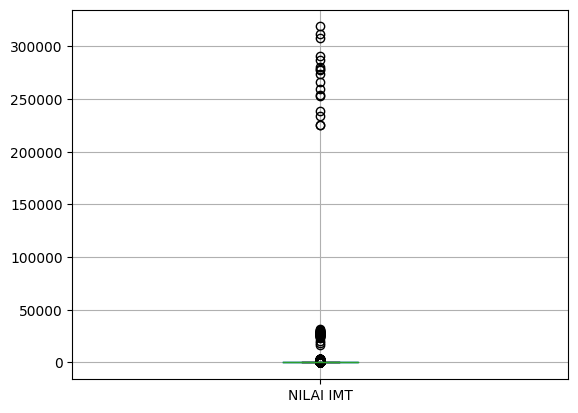

In [ ]:
cf2.boxplot('NILAI IMT') #Melihat outliers nilai imt

<Axes: >

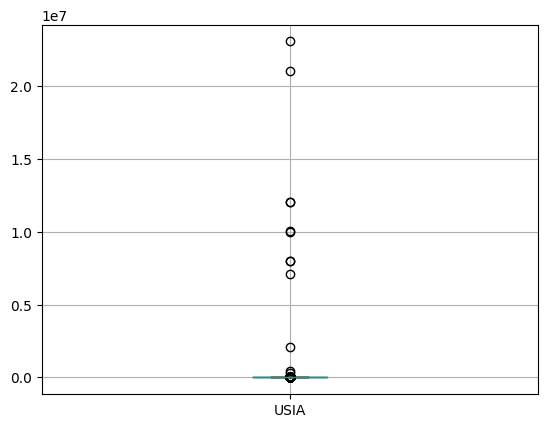

In [ ]:
cf2.boxplot('USIA')#Melihat outliers usia

<Axes: >

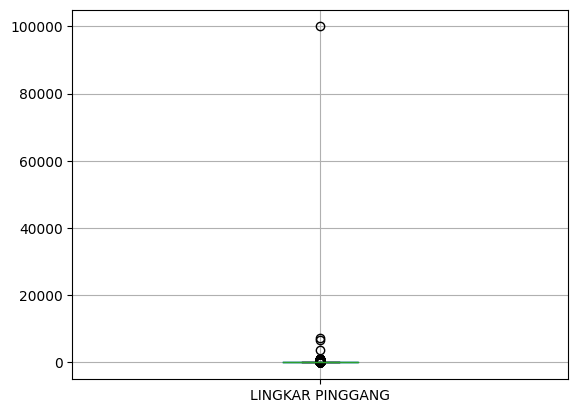

In [ ]:
cf2.boxplot('LINGKAR PINGGANG') #Melihat outliers lingkar pinggang

Terlihat bahwa terdapat outliers dalam usia, lingkar pinggang, dan nilai imt. Akan diremove outliers menggunakan kuartil

In [ ]:
# Hitung kuartil pertama (Q1) dan kuartil ketiga (Q3)
Q1 = cf2.quantile(0.25)
Q3 = cf2.quantile(0.75)

# Hitung IQR (Interquartile Range)
IQR = Q3 - Q1

# Identifikasi dan hapus outlier dari DataFrame
filtered_cf2 = cf2[~((cf2 < (Q1 - 1.5 * IQR)) | (cf2 > (Q3 + 1.5 * IQR))).any(axis=1)]

<ipython-input-7-9838ad77848a>:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = cf2.quantile(0.25)
<ipython-input-7-9838ad77848a>:3: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = cf2.quantile(0.75)
<ipython-input-7-9838ad77848a>:9: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  filtered_cf2 = cf2[~((cf2 < (Q1 - 1.5 * IQR)) | (cf2 > (Q3 + 1.5 * IQR))).any(axis=1)]


In [ ]:
dum = filtered_cf2.groupby('WILAYAH').agg({'NILAI IMT': ['min', 'max']}) #Akan dilihat nilai max dan min imt tiap wilayah
dum

NILAI IMT           
                 min        max
WILAYAH                        
ACEH       17.006803  33.910035
BABEL      16.955017  33.910035
BALI       17.065557  33.910035
BANTEN     17.301038  33.910035
BENGKULU   17.358919  33.897211
DIY        17.263545  33.910035
GORONTALO  17.056177  33.910035
JABAR      16.974654  33.910035
JAMBI      17.056177  33.910035
JATENG     17.099278  33.910035
JATIM      16.979592  33.910035
KALBAR     17.087445  33.910035
KALSEL     17.301038  33.910035
KALTARA    17.090093  33.910035
KALTENG    17.187500  33.910035
KALTIM     17.301038  33.910035
KEPRI      17.263545  33.910035
LAMPUNG    16.955017  33.897211
MALUKU     16.955017  33.910035
MALUT      17.263545  33.910035
METROJAYA  17.211087  33.910035
NTB        16.975309  33.910035
NTT        17.224804  33.910035
PABAR      16.979592  33.910035
PAPUA      17.040329  33.910035
RIAU       17.481790  33.910035
SULBAR     17.555619  33.897211
SULSEL     17.211087  33.910035
SULTENG    17.006803  33.910035
SULTRA     17.175320  33.897211
SULUT      17.006803  33.910035
SUMBAR     17.006803  33.910035
SUMSEL     17.099278  33.910035
SUMUT      17.175320  33.910035

In [ ]:
tum = filtered_cf2.groupby('JENIS KELAMIN').agg({'NILAI IMT': ['min', 'max']}) #Akan dilihat nilai max dan min imt tiap kelamin
tum

NILAI IMT           
                     min        max
JENIS KELAMIN                      
LAKI - LAKI    16.955017  33.910035
PEREMPUAN      16.974654  33.910035

In [ ]:
gum = filtered_cf2.groupby('Kelompok Umur').agg({'NILAI IMT': ['min', 'max']}) #Akan dilihat nilai max dan min imt tiap kelompok umur
gum

NILAI IMT           
                     min        max
Kelompok Umur                      
15 - 24        16.979592  33.910035
25 - 34        16.955017  33.910035
35 - 44        16.979592  33.910035
45 - 54        16.955017  33.910035
55 - 64        17.211087  33.910035
≥ 65           22.038567  30.071168

In [ ]:
lum = filtered_cf2.groupby('IMT').agg({'NILAI IMT': ['min', 'max']}) #Akan dilihat nilai max dan min imt tiap imt
lum

NILAI IMT           
                    min        max
IMT                               
Gemuk         25.000000  26.989619
Kurus         17.006803  18.496499
Normal        18.507766  24.998904
Obesitas      27.005131  33.910035
Sangat Kurus  16.955017  16.979592

In [ ]:
kum = filtered_cf2.groupby('LINGKAR PINGGANG').agg({'NILAI IMT': ['min', 'max']}) #Akan dilihat nilai max dan min imt per lingkar pinggang
kum

NILAI IMT           
                        min        max
LINGKAR PINGGANG                      
0.00              18.218322  33.425161
0.75              26.813590  26.813590
1.00              18.518519  31.511502
2.00              21.224490  21.224490
3.00              19.031142  29.000595
...                     ...        ...
150.00            20.569330  33.910035
152.00            25.864512  25.864512
154.00            30.387105  30.387105
155.00            26.827421  33.576509
156.00            24.654832  30.778701

[174 rows x 2 columns]

In [ ]:
filtered_cf2

,WILAYAH,PENDIDIKAN TERAKHIR,USIA,JENIS KELAMIN,Kelompok Umur,LINGKAR PINGGANG,NILAI IMT,IMT
0,KALBAR,SMA,34.0,LAKI - LAKI,25 - 34,100.0,29.796114,Obesitas
1,KALBAR,SMA,43.0,LAKI - LAKI,35 - 44,80.0,24.364563,Normal
2,KALBAR,SMA,21.0,LAKI - LAKI,15 - 24,78.0,20.883912,Normal
3,KALBAR,S2,40.0,LAKI - LAKI,35 - 44,34.0,28.753975,Obesitas
4,KALBAR,SMA,28.0,LAKI - LAKI,25 - 34,32.0,22.911836,Normal
...,...,...,...,...,...,...,...,...
289794,DIY,SMA,46.0,LAKI - LAKI,45 - 54,32.0,21.007668,Normal
289795,JATENG,SMA,53.0,LAKI - LAKI,45 - 54,70.0,21.007668,Normal
289796,KALSEL,SMA,23.0,LAKI - LAKI,15 - 24,78.0,21.007668,Normal
289797,JATENG,SMA,54.0,PEREMPUAN,45 - 54,62.0,24.973985,Normal


In [ ]:
filtered_cf2['IMT'].unique() #Melihat tipe imt

array(['Obesitas', 'Normal', 'Gemuk', nan, 'Kurus', 'Sangat Kurus'],
      dtype=object)

In [ ]:
filtered_cf2.dropna(subset=['IMT'], inplace=True) #Remove nan
filtered_cf2['IMT'].unique()

<ipython-input-28-e54c85c5c57b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_cf2.dropna(subset=['IMT'], inplace=True)


array(['Obesitas', 'Normal', 'Gemuk', 'Kurus', 'Sangat Kurus'],
      dtype=object)

In [ ]:
cf4 = filtered_cf2.groupby('Kelompok Umur').mean()
cf4

<ipython-input-29-dbcc3fdf951d>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cf4 = filtered_cf2.groupby('Kelompok Umur').mean()


,USIA,LINGKAR PINGGANG,NILAI IMT
Kelompok Umur,,,
15 - 24,21.510482,59.391379,23.182410
25 - 34,28.967760,63.593032,25.112389
35 - 44,39.247208,64.475063,25.825580
45 - 54,48.612912,69.049022,25.990534
55 - 64,56.175041,72.813514,25.770441
≥ 65,61.936452,71.838710,25.628243


In [ ]:
filtered_cf2

,WILAYAH,PENDIDIKAN TERAKHIR,USIA,JENIS KELAMIN,Kelompok Umur,NILAI IMT,IMT
0,KALBAR,SMA,34.0,LAKI - LAKI,25 - 34,29.796114,Obesitas
1,KALBAR,SMA,43.0,LAKI - LAKI,35 - 44,24.364563,Normal
2,KALBAR,SMA,21.0,LAKI - LAKI,15 - 24,20.883912,Normal
3,KALBAR,S2,40.0,LAKI - LAKI,35 - 44,28.753975,Obesitas
4,KALBAR,SMA,28.0,LAKI - LAKI,25 - 34,22.911836,Normal
...,...,...,...,...,...,...,...
289794,DIY,SMA,46.0,LAKI - LAKI,45 - 54,21.007668,Normal
289795,JATENG,SMA,53.0,LAKI - LAKI,45 - 54,21.007668,Normal
289796,KALSEL,SMA,23.0,LAKI - LAKI,15 - 24,21.007668,Normal
289797,JATENG,SMA,54.0,PEREMPUAN,45 - 54,24.973985,Normal


In [ ]:
filtered_cf2.describe() #Melihat statistik

,USIA,LINGKAR PINGGANG,NILAI IMT
count,283658.00000,283658.000000,283651.000000
mean,36.89609,64.780644,25.330549
std,9.83148,24.760377,2.943986
min,15.00000,0.000000,16.955017
25%,29.00000,35.000000,23.306680
50%,38.00000,72.000000,25.099502
75%,44.00000,84.000000,27.358845
max,66.00000,156.000000,33.910035


<Axes: >

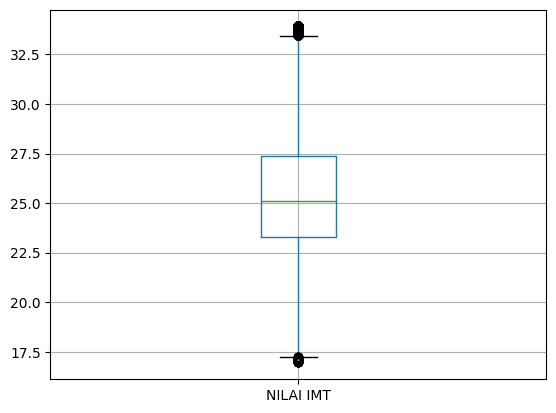

In [ ]:
filtered_cf2.boxplot('NILAI IMT')

<Axes: >

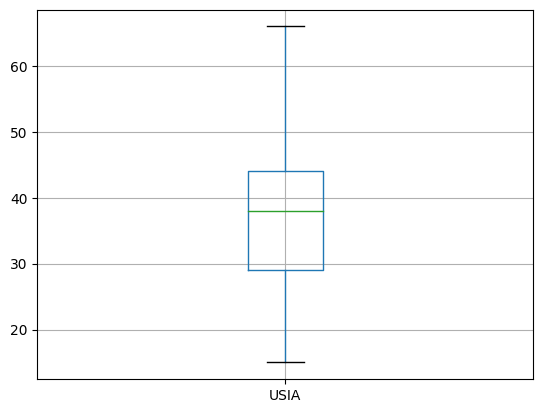

In [ ]:
filtered_cf2.boxplot('USIA')

<Axes: >

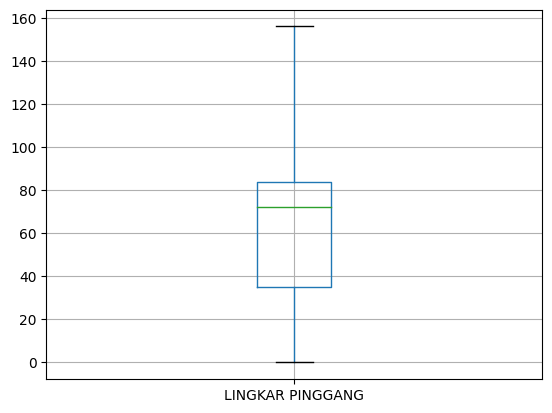

In [ ]:
filtered_cf2.boxplot('LINGKAR PINGGANG')

In [ ]:
filtered_cf2.to_csv('Data_Kompstat_DoneBener.csv', index=False)

<Axes: xlabel='USIA', ylabel='NILAI IMT'>

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


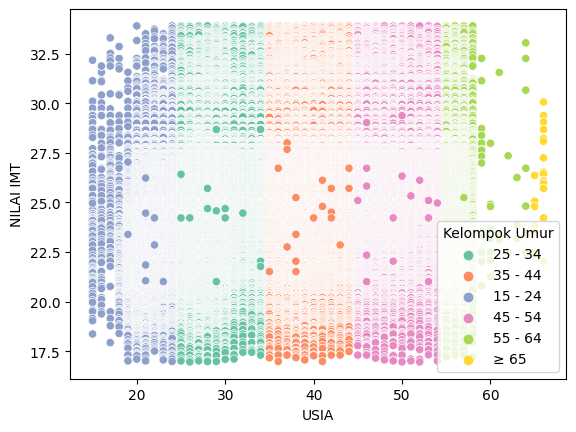

In [ ]:
kel_usia = filtered_cf2['USIA'].tolist()
kel_imt = filtered_cf2['NILAI IMT'].tolist()
sns.scatterplot(x='USIA', y='NILAI IMT', hue='Kelompok Umur', palette="Set2", data=filtered_cf2)

# **K-Means**

## 1. Load Data

Membaca dataframe untuk K-Means

In [ ]:
data = pd.read_csv('/content/Data_Kompstat_DoneBener.csv') #menyimpan datframe ke dalam variabel data

Mengambil variabel numerik ("NILAI IMT", "USIA" dan "LINGKAR PINGGANG") dari dataframe.

Kemudian menyimpan dataframe ke masing-masing variabel yang bersesuaian.

In [ ]:
df_num = data[['NILAI IMT', 'USIA','LINGKAR PINGGANG']].copy() #Untuk yang hanya numerical

## 2. Scaling Data

In [ ]:
#Melakukan scaling
df_num = ((df_num - df_num.min()) / (df_num.max() - df_num.min())) * 9 + 1

Melakukan scaling atau normalisasi data menjadi berada di rentang 1 - 10. Tujuannya untuk menyamakan satuan yang berbeda dari ketiga variabel numerik tersebut sehingga tiap variabel memberikan dampak yang seimbang terhadap model yang akan dibuat.

Penerapan scaling pada data sebelum menggunakan algoritma K-Means sangat penting. K-Means mengukur jarak antar titik data untuk menentukan kluster, dan jika variabel-variabel memiliki skala yang berbeda, hasil clustering dapat dipengaruhi oleh variabel yang memiliki nilai yang lebih besar.

Membuat datarame untuk clustering IMT dengan USIA saja dan IMT dengan Lingkar Pinggang saja.

In [ ]:
df_usia = df_num[['NILAI IMT', 'USIA']].copy() #Untuk usia dan IMT
df_lp = df_num[['NILAI IMT','LINGKAR PINGGANG']].copy() #Untuk lingakr pinggang dan IMT

SKALA UNTUK INTERPRETASI K-MEANS CLUSTERING </p>
IMT</p>
1 - 2.5 kurus </p>
2.6 - 5 normal</p>
5.1 - 7.5 gemuk</p>
7.6 - 10 obesitas</p>

LINGKAR PINGGANG</p>
1 - 2.5 kecil</p>
2.6 - 5 normal</p>
5.1 - 7.5 besar</p>
7.6 - 10 sangat besar </p>

USIA</p>
1 - 2.5 remaja = 15-31</p>
2.6 - 5 dewasa = 32-47</p>
5.1 - 7.5 lansia = 48-65</p>
7.6 - 10 manula = >65</p>

## 3. Functions

Membuat 4 fungsi untuk perhitungan K-Means yaitu:
1.   random_centroids : Pemilihan centroid secara acak
2.   get_labels : Penghitungan jarak menggunakan metode jarak Euclidian dan menyocokkannya ke centroid awal terdekat
3.   new_centroids : Penghitungan centroid baru
4.   plot_cluster : Membuat plottingan K-Means

In [ ]:
# Mendefinisikan fungsi random_centroids dengan dua parameter yaitu data dan k
def random_centroids(data, k):
    # Menetapkan seed untuk menghasilkan nilai acak yang sama saat di run ulang
    np.random.seed(79)

    # List untuk menyimpan centroid
    centroids = []

    # For loop untuk membuat k centroids
    for i in range(k):
        # Membuat centroid dengan memilih nilai acak dari setiap kolom data
        centroid = data.apply(lambda x: float(x.sample()))

        # Menambahkan centroid ke dalam list centroids
        centroids.append(centroid)

    # Menggabungkan centroids menjadi satu DataFrame
    return pd.concat(centroids, axis=1)

In [ ]:
def get_labels(data, centroids): #Euclidian
    # Menghitung jarak antara setiap titik data dan setiap pusat klaster (centroid)
    distances = centroids.apply(lambda x: np.sqrt(((data - x) ** 2).sum(axis=1)))

    # Mengembalikan indeks kolom dengan nilai jarak terkecil sebagai label klaster untuk setiap titik data
    return distances.idxmin(axis=1)

In [ ]:
def new_centroids(data, labels, k):
    # Mengelompokkan data berdasarkan label klaster dan menghitung rata-rata dalam setiap klaster
    centroids = data.groupby(labels).apply(lambda x: np.exp(np.log(x).mean())).T

    # Mengembalikan DataFrame yang berisi pusat klaster baru
    return centroids

In [ ]:
def plot_clusters(data, labels, centroids, iteration):
    # Menggunakan Principal Component Analysis (PCA) untuk mereduksi dimensi data ke 2
    pca = PCA(n_components=2)
    data_2d = pca.fit_transform(data)

    # Mereduksi dimensi pusat klaster ke 2 menggunakan PCA
    centroids_2d = pca.transform(centroids.T)

    # Menghapus output sebelumnya dan membuat plot baru
    clear_output(wait=True)
    fig, ax = plt.subplots()

    # Membuat scatter plot untuk data dengan warna berdasarkan label klaster
    scatter = ax.scatter(x=data_2d[:,0], y=data_2d[:,1], c=labels)

    # Menambahkan scatter plot untuk pusat klaster
    ax.scatter(x=centroids_2d[:,0], y=centroids_2d[:,1])

    # Menambahkan legenda untuk label klaster
    legend1 = ax.legend(*scatter.legend_elements(), loc="lower left", title="Clusters")
    ax.add_artist(legend1)

    # Menampilkan plot
    plt.show()

## 4. K-Means All

In [ ]:
#Memanggi dataframe df_num
df_num

,NILAI IMT,USIA,LINGKAR PINGGANG
0,7.816264,4.352941,6.769231
1,4.933108,5.941176,5.615385
2,3.085521,2.058824,5.500000
3,7.263080,5.411765,2.961538
4,4.161976,3.294118,2.846154
...,...,...,...
283646,3.151213,6.470588,2.846154
283647,3.151213,7.705882,5.038462
283648,3.151213,2.411765,5.500000
283649,5.256599,7.882353,4.576923


In [ ]:
#Melihat statistika deskriptif
df_num.describe()

,NILAI IMT,USIA,LINGKAR PINGGANG
count,283651.000000,283651.000000,283651.000000
mean,5.445869,4.864001,4.737361
std,1.562716,1.734971,1.428490
min,1.000000,1.000000,1.000000
25%,4.371566,3.470588,3.019231
50%,5.323225,5.058824,5.153846
75%,6.522522,6.117647,5.846154
max,10.000000,10.000000,10.000000


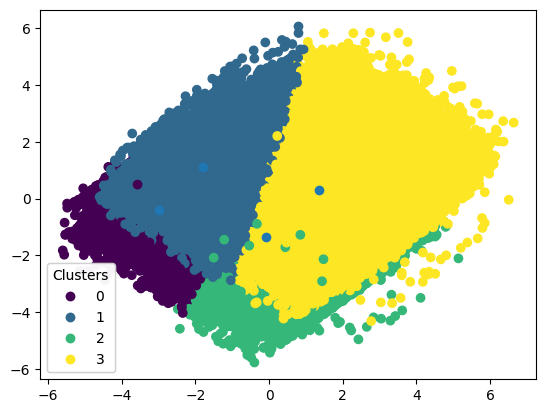

In [ ]:
# Maksimum jumlah iterasi maksimum yang diizinkan dalam algoritma klastering
max_iterations = 1000
# Jumlah pusat klaster yang diinginkan sekaligus menentukan jumlah cluster yang akan terbentuk
centroid_count = 4

# Menghasilkan pusat klaster acak awal
centroids = random_centroids(df_num, centroid_count)

# Pusat klaster sebelum iterasi (awalnya kosong)
old_centroids = pd.DataFrame()

# Inisialisasi iterasi
iteration = 1

# Melakukan WHILE LOOP hingga mencapai batas maksimum iterasi atau konvergensi pusat klaster
while iteration < max_iterations and not centroids.equals(old_centroids):
    # Menyimpan pusat klaster sebelum iterasi
    old_centroids = centroids

    # Mendapatkan label klaster untuk setiap titik data
    labels = get_labels(df_num, centroids)

    # Menghitung pusat klaster baru berdasarkan label klaster
    centroids = new_centroids(df_num, labels, centroid_count)
    iteration += 1 # Menambah iterasi

# Menampilkan hasil klastering dalam bentuk plot
plot_clusters(df_num, labels, centroids, iteration)

In [ ]:
#Melihat anggota di tiap cluster
labels.value_counts()

3    117413
2     70998
1     60709
0     34531
dtype: int64

In [ ]:
#Melihat centroids
centroids

,0,1,2,3
NILAI IMT,3.999960,4.428593,5.443931,5.966873
USIA,2.776573,2.927118,5.520275,5.777120
LINGKAR PINGGANG,2.945320,5.414689,3.086796,5.831316


In [ ]:
#Melihat jumlah iterasi sampai cluter konvergen
iteration

178

**INTERPRETASI**
1. Cluster 0 </p>
Kumpulan orang dengan kelompok usia 32-48 tahun (dewasa) dan lingkar pinggang normal yang memiliki IMT normal.
2. Cluster 1 </p>
Kumpulan orang dengan kelompok usia 32-48 tahun (dewasa) dan lingkar pinggang besar yang memiliki IMT normal.
3. Cluster 2 </p>
Kumpulan orang dengan kelompok usia 49-65 tahun (lansia) dan lingkar pinggang normal yang memiliki nilai IMT gemuk.
4. Cluster 3 </p>
Kumpulan orang dengan kelompok usia 45-54 tahun (lansia) dan lingkar pinggang besar yang memiliki nilai IMT gemuk.


Centroid </p>
Pada hasil labels.value_count() dapat dilihat bahwa observasi tidak terbagi secara merata. Ada cluster yang mendominasi yaitu cluster 3 yang memiliki jumlah anggota sebanyak 117413.

## 5. K-Means Usia

In [ ]:
# Melihat dataframe usia
df_usia

,NILAI IMT,USIA
0,29.796114,34.0
1,24.364563,43.0
2,20.883912,21.0
3,28.753975,40.0
4,22.911836,28.0
...,...,...
283646,21.007668,46.0
283647,21.007668,53.0
283648,21.007668,23.0
283649,24.973985,54.0


In [ ]:
#Melihat statistika deskriptif
df_usia.describe()

,NILAI IMT,USIA
count,283651.000000,283651.000000
mean,25.330549,36.896006
std,2.943986,9.831503
min,16.955017,15.000000
25%,23.306680,29.000000
50%,25.099502,38.000000
75%,27.358845,44.000000
max,33.910035,66.000000


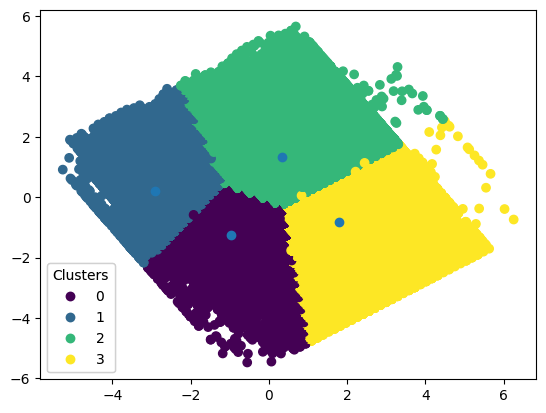

In [ ]:
# Maksimum jumlah iterasi maksimum yang diizinkan dalam algoritma klastering
max_iterations = 1000
# Jumlah pusat klaster yang diinginkan sekaligus menentukan jumlah cluster yang akan terbentuk
centroid_count = 4

# Menghasilkan pusat klaster acak awal
centroids = random_centroids(df_usia, centroid_count)

# Pusat klaster sebelum iterasi (awalnya kosong)
old_centroids = pd.DataFrame()

# Inisialisasi iterasi
iteration = 1

# Melakukan WHILE LOOP hingga mencapai batas maksimum iterasi atau konvergensi pusat klaster
while iteration < max_iterations and not centroids.equals(old_centroids):
    # Menyimpan pusat klaster sebelum iterasi
    old_centroids = centroids

    # Mendapatkan label klaster untuk setiap titik data
    labels = get_labels(df_usia, centroids)

    # Menghitung pusat klaster baru berdasarkan label klaster
    centroids = new_centroids(df_usia, labels, centroid_count)
    iteration += 1 # Menambah iterasi

# Menampilkan hasil klastering dalam bentuk plot
plot_clusters(df_usia, labels, centroids, iteration)

In [ ]:
#Melihat anggota di tiap cluster
labels.value_counts()

2    97648
3    76641
0    58061
1    51301
dtype: int64

In [ ]:
#Melihat centroid
centroids

,0,1,2,3
NILAI IMT,5.950863,3.651465,4.533565,7.139675
USIA,3.371032,2.548154,5.893771,5.892210


In [ ]:
#Mencetak banyak iterasi yang dilakukan sampai cluster konvergen
iteration

**INTERPRETASI**
1. Cluster 0 </p>
Kumpulan orang dengan kelompok usia 32-48 tahun (dewasa) yang memiliki nilai IMT gemuk.
2. Cluster 1 </p>
Kumpulan orang dengan kelompok usia 15-31 tahun (remaja) yang memiliki nilai IMT normal.
3. Cluster 2 </p>
Kumpulan orang dengan kelompok usia 49-65 tahun (lansia) yang memiliki nilai IMT normal.
4. Cluster 3 </p>
Kumpulan orang dengan kelompok usia 45-54 tahun (lansia) yang memiliki nilai IMT gemuk/cenderung obesitas.


Centroids </p>
Dari output labels.value_counts(), kita dapat melihat bahwa data tersebar secara merata pada cluster sehingga tidak ada cluster yang mendominasi.

## 6. K-Means Lingkar Pinggang

In [ ]:
#Melihat dataframe
df_lp

,NILAI IMT,LINGKAR PINGGANG
0,29.796114,100.0
1,24.364563,80.0
2,20.883912,78.0
3,28.753975,34.0
4,22.911836,32.0
...,...,...
283646,21.007668,32.0
283647,21.007668,70.0
283648,21.007668,78.0
283649,24.973985,62.0


In [ ]:
#Melihat statistika deskriptif
df_lp.describe()

,NILAI IMT,LINGKAR PINGGANG
count,283651.000000,283651.000000
mean,25.330549,64.780917
std,2.943986,24.760502
min,16.955017,0.000000
25%,23.306680,35.000000
50%,25.099502,72.000000
75%,27.358845,84.000000
max,33.910035,156.000000


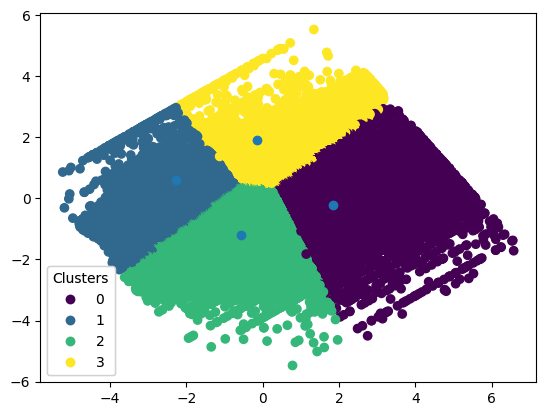

In [ ]:
# Maksimum jumlah iterasi maksimum yang diizinkan dalam algoritma klastering
max_iterations = 1000
# Jumlah pusat klaster yang diinginkan sekaligus menentukan jumlah cluster yang akan terbentuk
centroid_count = 4

# Menghasilkan pusat klaster acak awal
centroids = random_centroids(df_lp, centroid_count)

# Pusat klaster sebelum iterasi (awalnya kosong)
old_centroids = pd.DataFrame()

# Inisialisasi iterasi
iteration = 1

# Melakukan WHILE LOOP hingga mencapai batas maksimum iterasi atau konvergensi pusat klaster
while iteration < max_iterations and not centroids.equals(old_centroids):
    # Menyimpan pusat klaster sebelum iterasi
    old_centroids = centroids

    # Mendapatkan label klaster untuk setiap titik data
    labels = get_labels(df_lp, centroids)

    # Menghitung pusat klaster baru berdasarkan label klaster
    centroids = new_centroids(df_lp, labels, centroid_count)
    iteration += 1 # Menambah iterasi

# Menampilkan hasil klastering dalam bentuk plot
plot_clusters(df_lp, labels, centroids, iteration)

In [ ]:
#Melihat anggota di tiap cluster
labels.value_counts()

2    94527
0    85581
1    53675
3    49868
dtype: int64

In [ ]:
#Melihat centroid final
centroids

,0,1,2,3
NILAI IMT,6.824666,3.933161,4.288842,6.422125
LINGKAR PINGGANG,5.987012,2.936509,5.402518,3.102942


In [ ]:
#Mencetak banyak iterasi yang telah dilakukan sampai cluster konvergen
iteration

19

**INTERPRETASI**
1. Cluster 0 </p>
Kumpulan orang dengan lingkar pinggang tergolong besar yang memiliki IMT gemuk.
2. Cluster 1 </p>
Kumpulan orang dengan lingkar pinggang tergolong normal yang memiliki nilai IMT normal.
3. Cluster 2 </p>
Kumpulan orang dengan lingkar pinggang tergolong besar yang memiliki nilai IMT normal.
4. Cluster 3 </p>
Kumpulan orang dengan lingkar pinggang tergolong normal yang memiliki nilai IMT gemuk.


Centroids </p>
Dari output labels.value_counts(), kita dapat melihat bahwa data tersebar secara merata pada cluster sehingga tidak ada cluster yang mendominasi.

# **K-Means with Paralel**

K-Means dengan modul *multiprocessing* membagi tugas pada beberapa processor/CPU untuk dikerjakan  secara bersamaan dan meningkatkan efisiensi dalam mengelompokkan data besar menjadi cluster.

In [ ]:
data = filtered_cf2
import numpy as np
import multiprocessing

# Fungsi untuk menghitung jarak Euclidean antara dua vektor
def euclidean_distance(vec1, vec2):
    return np.linalg.norm(vec1 - vec2)

# Fungsi untuk menetapkan data ke klaster berdasarkan centroid terdekat
def assign_clusters(data, centroids):
    clusters = [[] for _ in range(len(centroids))]

    for point in data:
        distances = [euclidean_distance(point, centroid) for centroid in centroids] # Hitung jarak ke setiap centroid
        cluster_idx = np.argmin(distances) # Ambil indeks klaster dengan jarak terdekat
        clusters[cluster_idx].append(point) # Tambahkan titik ke klaster yang sesuai

    return clusters

# Fungsi untuk memperbarui posisi centroids berdasarkan klaster baru
def update_centroids(clusters):
    centroids = [np.mean(cluster, axis=0) if cluster else np.zeros_like(clusters[0][0]) for cluster in clusters]
    return centroids
# Hitung rata-rata dari setiap klaster, jika tidak ada titik di klaster, gunakan centroid sebelumnya

# Fungsi untuk menjalankan K-Means dalam proses paralel
def kmeans_worker(data_chunk, centroids, result_queue):
    clusters = assign_clusters(data_chunk, centroids) # Menetapkan klaster di setiap chunk data
    result_queue.put(clusters) # Menambahkan hasil klaster ke antrian hasil

# Fungsi untuk menjalankan K-Means dengan proses paralel menggunakan multiprocessing
def kmeans_parallel(data, k, num_iterations=100, num_processes=4):
    np.random.seed(42)

    # Inisialisasi centroid secara acak
    centroids = [data[i] for i in np.random.choice(range(len(data)), k, replace=False)]

    for _ in range(num_iterations):
        # Membagi data menjadi bagian-bagian untuk pemrosesan paralel
        data_chunks = np.array_split(data, num_processes)

        # Membuat antrian multiprocessing untuk mengumpulkan hasil
        result_queue = multiprocessing.Queue()

        # Membuat dan memulai proses pekerja
        processes = []
        for i in range(num_processes):
            process = multiprocessing.Process(target=kmeans_worker, args=(data_chunks[i], centroids, result_queue))
            processes.append(process)
            process.start()

        # Menunggu semua proses selesai
        for process in processes:
            process.join()

        # Mengumpulkan dan menggabungkan hasil dari semua proses
        clusters = [[] for _ in range(k)]
        for _ in range(num_processes):
            subclusters = result_queue.get() # Dapatkan hasil klaster dari antrian
            for i in range(k):
                clusters[i].extend(subclusters[i]) # Gabungkan hasil klaster dari setiap proses

        # Memperbarui centroids berdasarkan hasil penggabungan klaster
        centroids = update_centroids(clusters)

    return clusters, centroids

# 'k' adalah jumlah klaster
data = np.random.rand(100, 2)  # Contoh data acak dengan 100 titik dalam 2 dimensi
clusters, centroids = kmeans_parallel(data, k=4, num_iterations=100, num_processes=4)

# Print hasil klaster dan centroids
for i, cluster in enumerate(clusters):
    print(f"Klaster {i + 1}: {cluster}")

print("Centroids Akhir:")
print(centroids)

Klaster 1: [array([0.78978134, 0.55437854]), array([0.93665463, 0.79630406]), array([0.84970456, 0.86118647]), array([0.626957  , 0.71005147]), array([0.92649072, 0.74833061]), array([0.93671694, 0.9613205 ]), array([0.57412801, 0.66088352]), array([0.8336167, 0.522963 ]), array([0.8228325 , 0.58891987]), array([0.73256715, 0.93766027]), array([0.7421604 , 0.51974372]), array([0.99763794, 0.65630477]), array([0.6161083 , 0.62935728]), array([0.57656229, 0.80674242]), array([0.99267502, 0.68152928]), array([0.94071138, 0.54765084]), array([0.83103133, 0.6386603 ]), array([0.8747855 , 0.88727666]), array([0.85030882, 0.53364149]), array([0.68302945, 0.96665375]), array([0.88139211, 0.65310924]), array([0.64496692, 0.89048302]), array([0.95725331, 0.83337627]), array([0.73139905, 0.81799305]), array([0.72818249, 0.87882951]), array([0.7063385, 0.540694 ])]
Klaster 2: [array([0.79475095, 0.20862602]), array([0.57913104, 0.36180155]), array([0.78666457, 0.03349582]), array([0.53592767, 0.19

In [ ]:
wilayah_num =  filtered_cf2.groupby('WILAYAH')['WILAYAH'].count()
print(wilayah_num)

WILAYAH
ACEH          7812
BABEL         4021
BALI          7360
BANTEN        6058
BENGKULU      3999
DIY           7096
GORONTALO     4138
JABAR        27638
JAMBI         6301
JATENG       26529
JATIM        30502
KALBAR        9425
KALSEL        8856
KALTARA       2412
KALTENG       6823
KALTIM        4045
KEPRI         4700
LAMPUNG       6997
MALUKU        6801
MALUT         5661
METROJAYA    10026
NTB           6527
NTT           6548
PABAR         1905
PAPUA         3036
RIAU          7793
SULBAR        2359
SULSEL       11105
SULTENG       8351
SULTRA        4769
SULUT         4919
SUMBAR        8204
SUMSEL        9930
SUMUT        11167
Name: WILAYAH, dtype: int64


# Summary

Hasil yang diperoleh menggunakan K-Means Clustering Paralel sama dengan K-Means Clustering biasa. Hanya saja K-Means Clustering with Paralel Computation lebih unggul dalam proses komputasi yang hanya membutuhkan waktu/proses yang singkat karena prosesnya dilakukan secara paralel atau bersamaan.

###VIDEO KELOMPOK
https://www.youtube.com/watch?v=3csdLQC7vPI
